In [1]:
from mmpose.apis import (inference_top_down_pose_model, init_pose_model,
                         vis_pose_result, process_mmdet_results)
from mmdet.apis import inference_detector, init_detector

/home/tbaderts/miniconda3/envs/mmpose/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from mmcv import Config

pose_cfg = Config.fromfile(
    './configs/hand/2d_kpt/topdown/onehand10k/res50_onehand10k_256x256.py'
)

pose_checkpoint = 'https://download.openmmlab.com/mmpose/top_down/resnet/res50_onehand10k_256x256-e67998f6_20200813.pth'
det_config = './configs/cascade_rcnn_x101_64x4d_fpn_1class.py'
det_checkpoint = 'https://download.openmmlab.com/mmpose/mmdet_pretrained/cascade_rcnn_x101_64x4d_fpn_20e_onehand10k-dac19597_20201030.pth'

In [3]:
# initialize pose model
pose_model = init_pose_model(pose_cfg, pose_checkpoint, device='cuda:0')
# initialize detector
det_model = init_detector(det_config, det_checkpoint, device='cuda:0')

load checkpoint from http path: https://download.openmmlab.com/mmpose/top_down/resnet/res50_onehand10k_256x256-e67998f6_20200813.pth
load checkpoint from http path: https://download.openmmlab.com/mmpose/mmdet_pretrained/cascade_rcnn_x101_64x4d_fpn_20e_onehand10k-dac19597_20201030.pth


In [4]:
img = '../../testdata/hand/img/test_2.jpg'

# hand detection
mmdet_results = inference_detector(det_model, img)

# hand pose
hand_results = process_mmdet_results(mmdet_results, cat_id=1)

# inference pose
pose_results, returned_outputs = inference_top_down_pose_model(
    pose_model,
    img,
    hand_results,
    bbox_thr=0.3,
    format='xyxy',
    dataset='TopDownCocoDataset')

# show pose estimation results
vis_result = vis_pose_result(
    pose_model,
    img,
    pose_results,
    kpt_score_thr=0.,
    dataset='TopDownCocoDataset',
    show=False)

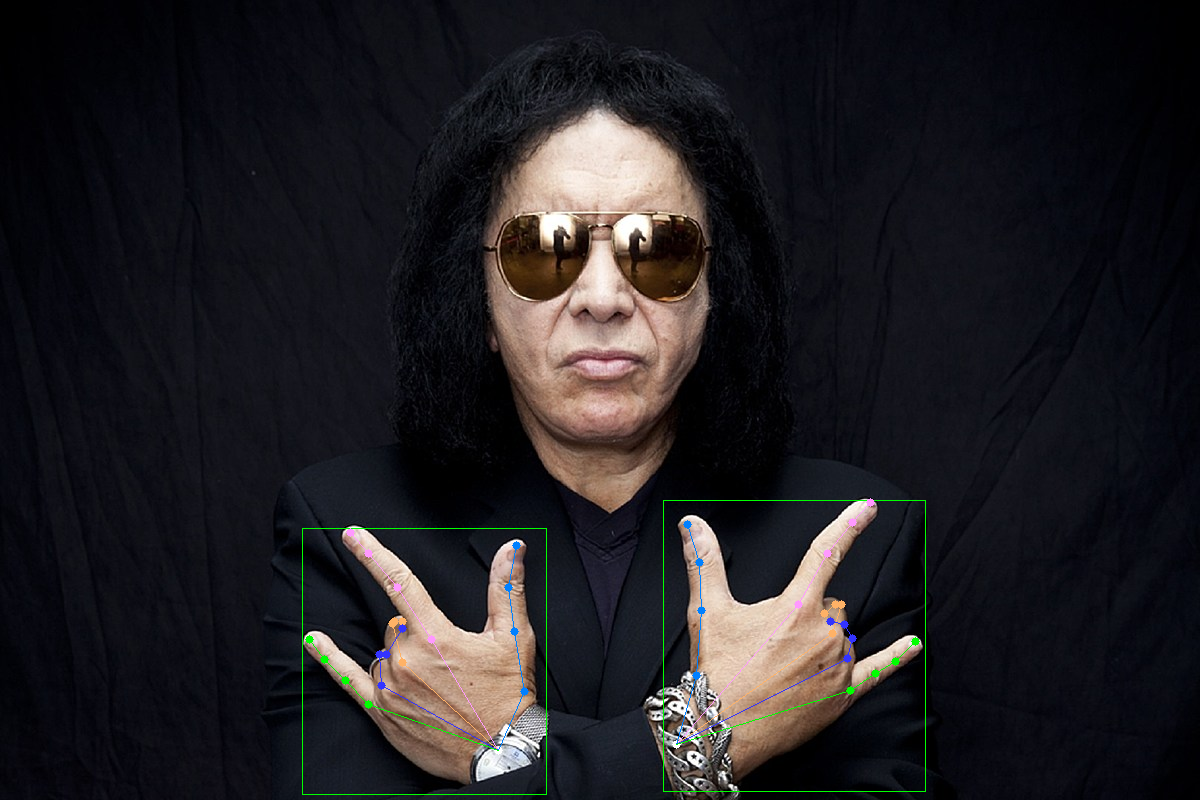

In [5]:
from IPython.display import Image, display
import tempfile
import os.path as osp
import cv2

with tempfile.TemporaryDirectory() as tmpdir:
        file_name = osp.join(tmpdir, 'pose_results.png')
        cv2.imwrite(file_name, vis_result)
        display(Image(file_name))